In [2]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# Análisis Exploratorio de los datos

In [3]:
total=pd.read_excel("TOTAL.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOSMUJ,SOCIOSHOM,PERMANENTEMUJ,PERMANENTEHOM,APRENDIZMUJ,APRENDIZHOM,...,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
145973,145898,11,1810,2008,0,0,0,2,0,0,...,3525900,3525900,0,0,2,912761,2602400,0,0,3460300
145979,145904,11,1810,2008,1,1,5,2,0,0,...,296411,296411,9406,0,7,122106,102941,0,0,296411
145987,145912,11,1810,2008,0,0,0,0,0,0,...,1594496,1594496,3200,46,0,366562,867491,0,194621,1597520
145988,145913,11,1741,2008,0,1,0,0,0,0,...,166200,166200,-2000,0,0,92868,26720,0,0,231480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987525,987525,8,139,2016,0,0,0,0,4,0,...,11257778,11907721,25885,84,0,3431145,4925968,0,654653,11002090
987529,987529,8,139,2016,0,0,7,11,0,1,...,1554335,1566400,0,0,18,794639,279709,244803,0,1657388
987530,987530,8,139,2016,0,0,33,32,2,1,...,86282095,85785462,262072,2,65,22787632,46732723,2530882,49583775,85991402
987533,987533,8,139,2016,0,0,5,5,1,1,...,7892838,7892838,0,36,10,3682753,4038309,0,0,8600884


Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.

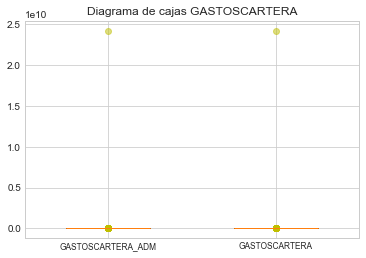

In [12]:
k=plt.boxplot([total.GASTOSCARTERA_ADM,total.GASTOSCARTERA],sym="y+",widths=0.5,whis=1.5)
plt.xticks([1,2],["GASTOSCARTERA_ADM","GASTOSCARTERA"],size="small")
plt.title("Diagrama de cajas GASTOSCARTERA");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='yellow', alpha=0.5)   # los puntos aislados son valores atípicos
    
plt.savefig("Diagrama de cajas GASTOS CARTERA.png")

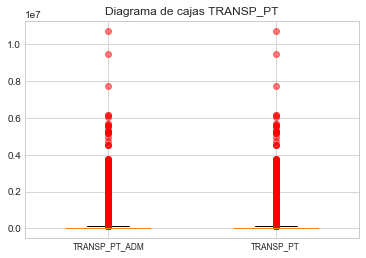

In [13]:
k=plt.boxplot([total.TRANSP_PT_ADM,total.TRANSP_PT],sym="r+",widths=0.5,whis=1.5)
plt.xticks([1,2],["TRANSP_PT_ADM","TRANSP_PT"],size="small")
plt.title("Diagrama de cajas TRANSP_PT");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos
    
plt.savefig("Diagrama de cajas Transporte Producto Terminado.png")

Después de analizar las gráficas se plantea ¿GASTOSCARTERA_ADM=GASTOSCARTERA? y ¿TRANSP_PT_ADM=TRANSP_PT? Para comprobarlo se utiliza la función equals (True son iguales y False son diferentes)

In [6]:
total['GASTOSCARTERA_ADM'].equals(total['GASTOSCARTERA']) #GASTOSCARTERA_ADM y GASTOSCARTERA son iguales

True

In [7]:
total['TRANSP_PT_ADM'].equals(total['TRANSP_PT']) #TRANSP_PT_ADM y TRANSP_PT son iguales

True

**Teniendo en cuenta que GASTOSCARTERA_ADM=GASTOSCARTERA y TRANSP_PT_ADM=TRANSP_PT ¿SE PUEDEN ELIMINAR LAS COLUMNAS GASTOSCARTERA_ADM Y TRANSP_PT_ADM? ESTOS ES CORRECTO???? POR FAVOR REVISAR**

Después de analizar los histogramas (Ver archivo Histogramas de las variables usadas en la investigación), diagramas de dispersión (Ver archivo Diagramas de dispersión de las variables usadas en la investigación) y los diagramas de cajas (Ver archivo Diagramas de cajas de las variables usadas en la investigación) se evidencia la gran cantidad de ceros que toma cada columna (variable)

In [62]:
# Para contar el número de veces que se presenta un valor en una columna se usa value_counts

total.SOCIOSMUJ.value_counts()

0     9805
1     1486
2      280
3       54
4       14
5        4
6        1
12       1
Name: SOCIOSMUJ, dtype: int64

In [4]:
df = pd.DataFrame(total)   #Contar los valores de todas las columnas
contar=df.apply(pd.Series.value_counts)
contar

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOSMUJ,SOCIOSHOM,PERMANENTEMUJ,PERMANENTEHOM,APRENDIZMUJ,APRENDIZHOM,...,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
-51543337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-25302483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-19647526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-16865778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-13083117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-12594535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-12315993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-11516913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9829251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9615245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Se utiliza la función loc para mostrar solo la fila cero
contar.loc[[0]]

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOSMUJ,SOCIOSHOM,PERMANENTEMUJ,PERMANENTEHOM,APRENDIZMUJ,APRENDIZHOM,...,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,NaN,NaN,NaN,NaN,9805.0,9596.0,2750.0,3299.0,7688.0,9208.0,...,NaN,NaN,4554.0,6167.0,2390.0,NaN,419.0,9995.0,8674.0,21.0


Al observar la tabla anterior se observa que 26 variables tienen más de 9000 datos en cero (13 variables más de 11000) siendo GASTOSEQTRANSP_USOPROPIO y GASTOSEINFORMATICA_USOPROPIO las variables que más tienen datos en cero (11640) (El total de empresas o datos en cada columna o variable es de 11645) Por lo que se considera eliminar POR EL MOMENTO estas 26 variables ya que no tienen información suficiente para el análisis

Las variables eliminadas son:

**Recursos Humanos:** (algunos) SOCIOSMUJ, SOCIOSHOM, APRENDIZHOM, PROD_EXT_MUJ, PROD_EXT_HOM

**Recursos Tangibles físicos:** (algunos) INVER_TERRENO, INVER_EDIF, INVER_EQTRANSP

**Capacidad dinámica de absorción:** (todos) OUTSOURCING_PROD, OUTSOURCING_ADM, TOTAL_OUTSOURCING, COMPRAS_MP_EXTERIOR

**Capacidad estática de marketing operativa:** (4 de 6) MUESTRASGRATIS_PROD, MUESTRASGRATIS_ADM, TOT_MUESTRASGRATIS, PUBLICIDAD_PROD

**Capacidad dinámica de absorción (transformación):** (todos) USO_PATENTES_ADM, TOTALUSO_PATENTES

**Capacidad de innovación:** (todos) GASTOSEDIF_USOPROPIO, GASTOSMAQ_USOPROPIO, GASTOSEINFORMATICA_USOPROPIO, GASTOSEOFICINA_USOPROPIO, GASTOSEQTRANSP_USOPROPIO, TOTALGASTOS_USOPROPIO

**Capacidad tecnológica dinámica:** (algunos) COMPRAEINFORMATICA_USADO, VAL_VENDIDOS_EINFORMATICA

In [80]:
totallimpio=total.drop([ 'SOCIOSMUJ' , 'SOCIOSHOM', 'APRENDIZHOM' , 'PROD_EXT_MUJ','PROD_EXT_HOM' , 'OUTSOURCING_PROD','OUTSOURCING_ADM' , 'TOTAL_OUTSOURCING', 'MUESTRASGRATIS_PROD' , 'MUESTRASGRATIS_ADM','TOT_MUESTRASGRATIS' , 'PUBLICIDAD_PROD','USO_PATENTES_ADM' , 'TOTALUSO_PATENTES', 'COMPRAEINFORMATICA_USADO' , 'GASTOSEDIF_USOPROPIO','GASTOSMAQ_USOPROPIO' , 'GASTOSEINFORMATICA_USOPROPIO','GASTOSEOFICINA_USOPROPIO' , 'GASTOSEQTRANSP_USOPROPIO', 'TOTALGASTOS_USOPROPIO' , 'INVER_TERRENO','INVER_EDIF' , 'INVER_EQTRANSP','VAL_VENDIDOS_EINFORMATICA' , 'COMPRAS_MP_EXTERIOR' ], axis = 1 ) 
totallimpio

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,PERMANENTEMUJ,PERMANENTEHOM,APRENDIZMUJ,PROD_NAL_MUJ,PROD_NAL_HOM,OBREROMUJ,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE,VAL_AGREGADO,MPCOMPRADA,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
145973,145898,11,1810,2008,0,2,0,1,1,8,...,641984,3525900,3525900,0,0,2,912761,2602400,0,3460300
145979,145904,11,1810,2008,5,2,0,0,0,2,...,201817,296411,296411,9406,0,7,122106,102941,0,296411
145987,145912,11,1810,2008,0,0,0,0,1,20,...,143460,1594496,1594496,3200,46,0,366562,867491,194621,1597520
145988,145913,11,1741,2008,0,0,0,1,1,1,...,8704,166200,166200,-2000,0,0,92868,26720,0,231480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987525,987525,8,139,2016,0,0,4,6,1,27,...,6085413,11257778,11907721,25885,84,0,3431145,4925968,654653,11002090
987529,987529,8,139,2016,7,11,0,0,1,8,...,501051,1554335,1566400,0,0,18,794639,279709,0,1657388
987530,987530,8,139,2016,33,32,2,14,17,251,...,21681651,86282095,85785462,262072,2,65,22787632,46732723,49583775,85991402
987533,987533,8,139,2016,5,5,1,2,4,13,...,1603874,7892838,7892838,0,36,10,3682753,4038309,0,8600884


# Teniendo en cuenta la importancia de las variables respuestas (Resultados financieros) se realiza un análisis descriptivo de ventas, exportaciones y valor agregado

Los estadísticos descriptivos más habitualmente utilizados han sido la media y la desviación típica. Sin embargo, el uso automático de estos índices no es muy aconsejable. Se hallan los valores máximos, media, mediana (percentil 50%), moda, desviación típica, varianza, percentil inferior 25% y percentil superior 75%

In [52]:
resumenestad=total.describe() # Resumen estadistadistico con pandas 
#cantidad,media,desviación, mímino, percentil inferior, 50% o mediana, percentil superior, máximo
resumenestad.loc[["mean","std","min","25%","50%","75%","max"],["VENTAS","EXPORTACIONES","VAL_AGREGADO"]]

,VENTAS,EXPORTACIONES,VAL_AGREGADO
mean,7.581216e+06,1.274879e+06,3.387853e+06
std,2.666495e+07,6.980126e+06,1.153659e+07
min,-1.541820e+05,0.000000e+00,1.200000e+01
25%,5.727380e+05,0.000000e+00,2.563880e+05
50%,1.464990e+06,0.000000e+00,6.630550e+05
75%,4.617908e+06,3.012000e+03,2.102883e+06
max,4.644679e+08,1.944166e+08,2.378099e+08



Muchas veces los indicadores de la estadística descriptiva no nos proporcionan una imagen clara de nuestros datos. Por esta razón, siempre es útil complementarlos con gráficos de las distribuciones de los datos, que describan con qué frecuencia aparece cada valor. La representación más común de una distribución es un histograma, que es un gráfico que muestra la frecuencia o probabilidad de cada valor. 

Text(0.5,1,'Histograma EXPORTACIONES')

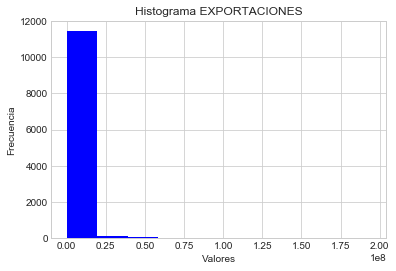

In [4]:
a=plt.hist(total.EXPORTACIONES,color="blue") #Histograma de una variable utilizando la función hist()
a=plt.xlabel("Valores")
a=plt.ylabel("Frecuencia");
a=plt.title("Histograma EXPORTACIONES")
a

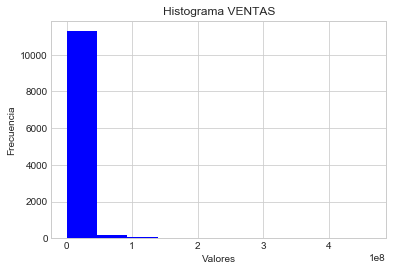

In [84]:
b=plt.hist(total.VENTAS,color="blue") #Histograma de una variable utilizando la función hist()
b=plt.xlabel("Valores")
b=plt.ylabel("Frecuencia");
b=plt.title("Histograma VENTAS")
b

plt.savefig("HistogramaVENTAS.png") #Guarda la imagen como png NO TIENE DISTRIBUCIÓN NORMAL

Text(0.5,1,'Histograma VAL_AGREGADO')

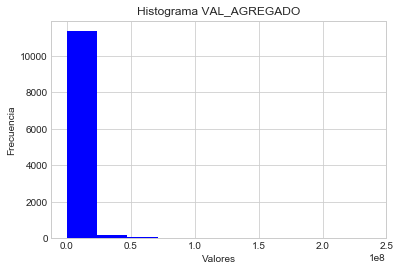

In [5]:
c=plt.hist(total.VAL_AGREGADO,color="blue") #Histograma de una variable utilizando la función hist()
c=plt.xlabel("Valores")
c=plt.ylabel("Frecuencia");
c=plt.title("Histograma VAL_AGREGADO")
c

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


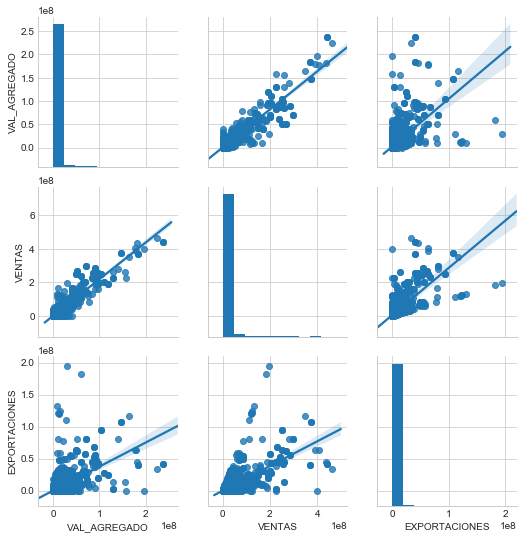

In [6]:
b = sns.pairplot(total, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables
b.savefig("RESULTADOSFINANCIEROS.png") #Guarda la imagen como png

Se realiza un resumen gráfico con histogramas y diagramas de dispersión para los resultados financieros de cada año en estudio y se observa que no tienen distribución normal y que el comportamiento en cada año es similar

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


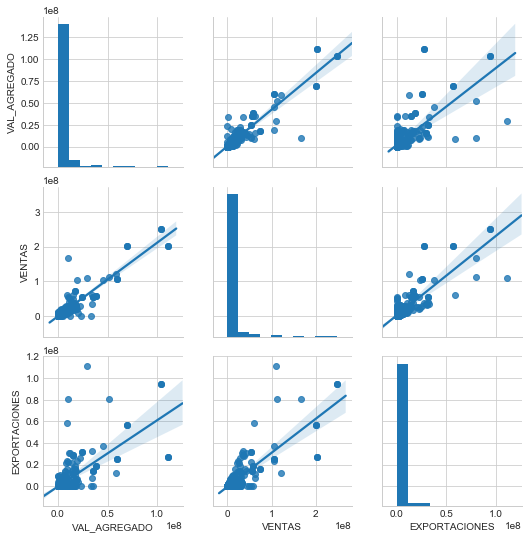

In [63]:
data=pd.read_excel("Filtrado2008.xlsx",index_col=0)
b = sns.pairplot(data, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables 2008

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


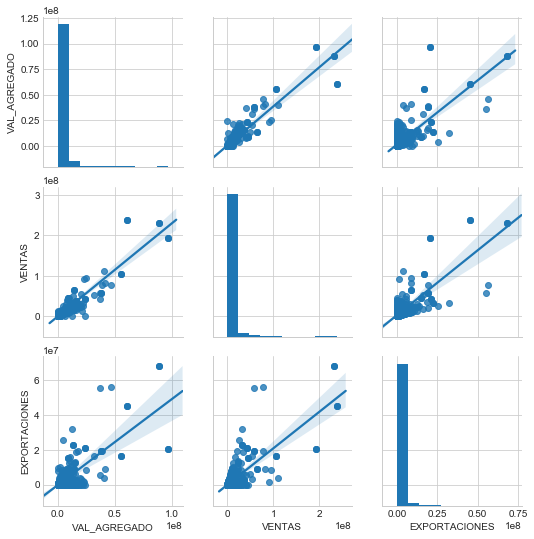

In [62]:
data_2=pd.read_excel("Filtrado2009.xlsx",index_col=0)
b = sns.pairplot(data_2, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables 2009

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


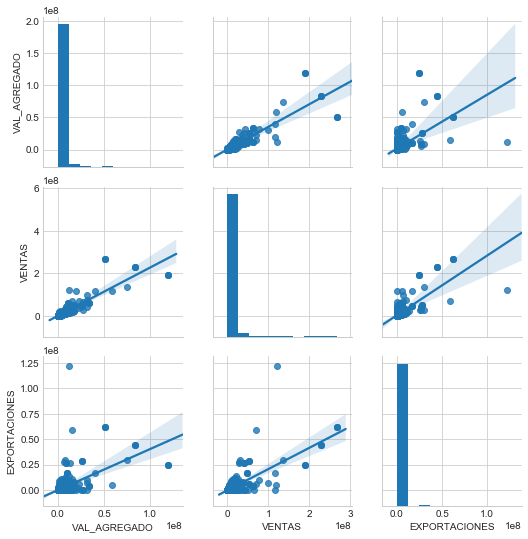

In [61]:
data_3=pd.read_excel("Filtrado2010.xlsx",index_col=0)
b = sns.pairplot(data_3, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables 2010

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


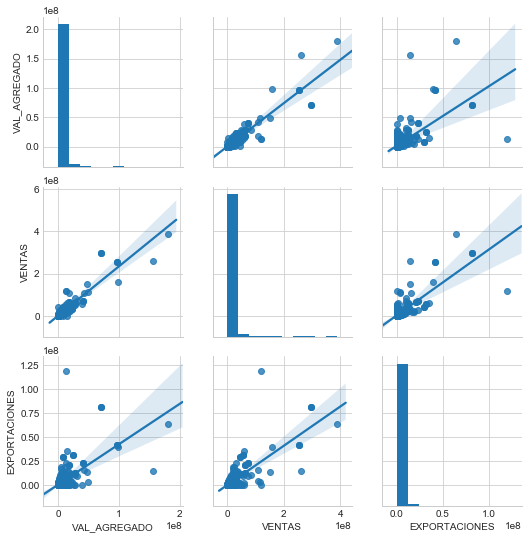

In [60]:
data_4=pd.read_excel("Filtrado2011.xlsx",index_col=0)
b = sns.pairplot(data_4, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables 2011

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


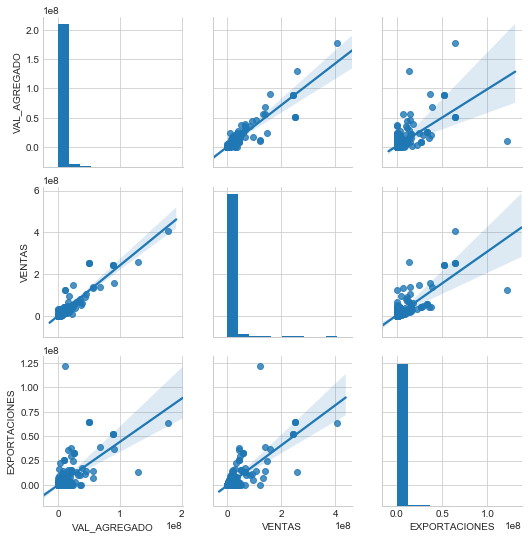

In [59]:
data_5=pd.read_excel("Filtrado2012.xlsx",index_col=0)
b = sns.pairplot(data_5, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables 2012

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


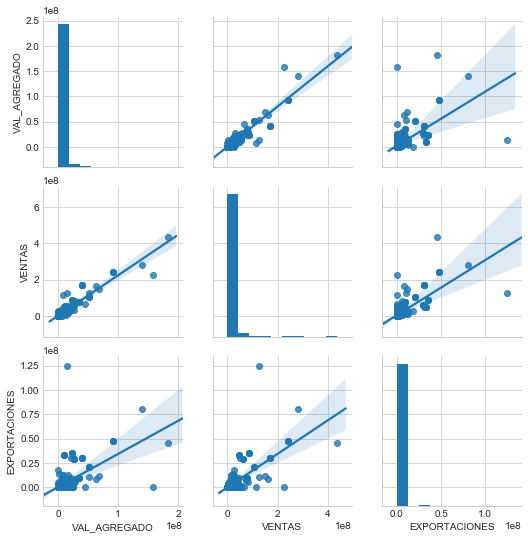

In [58]:
data_6=pd.read_excel("Filtrado2013.xlsx",index_col=0)
b = sns.pairplot(data_6, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables 2013

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


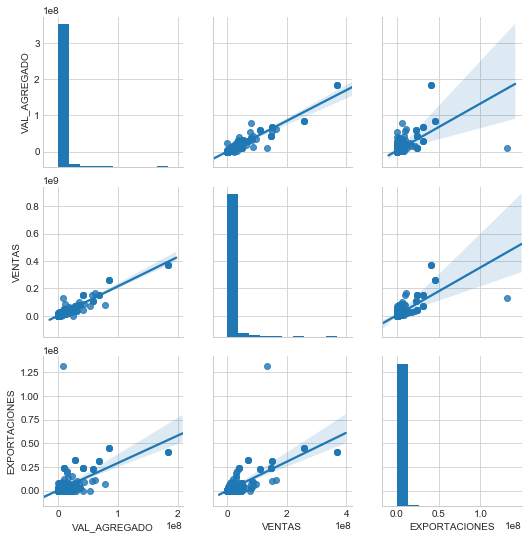

In [57]:
data_7=pd.read_excel("Filtrado2014.xlsx",index_col=0)
b = sns.pairplot(data_7, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables 2014

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


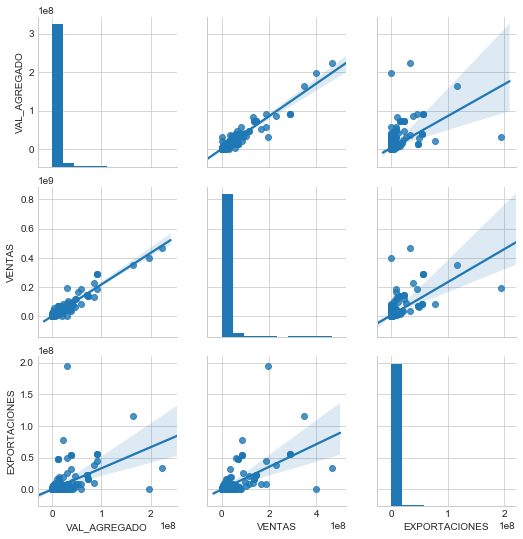

In [56]:
data_8=pd.read_excel("Filtrado2015.xlsx",index_col=0)
b = sns.pairplot(data_8, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables 2015

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


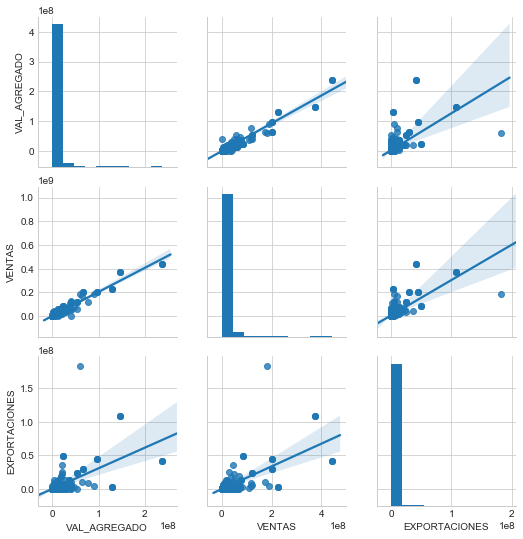

In [55]:
data_9=pd.read_excel("Filtrado2016.xlsx",index_col=0)
b = sns.pairplot(data_9, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables 2016

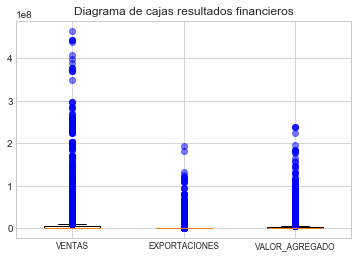

In [11]:
k=plt.boxplot([total.VENTAS,total.EXPORTACIONES,total.VAL_AGREGADO],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3],["VENTAS","EXPORTACIONES","VALOR_AGREGADO"],size="small")
plt.title("Diagrama de cajas resultados financieros");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='blue', alpha=0.5)   # los puntos aislados son valores atípicos


# PCA VENTAS, EXPORTACIONES y VLR.AGREGADO

In [5]:
from sklearn.decomposition import PCA

https://data-speaks.luca-d3.com/2018/06/python-para-todos-tutorial-de-pca-en-5.html
https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Los 6 pasos del proceso PCA.

Los pasos que vamos a dar y que explicaremos detalladamente son los siguientes:
1. Cargar los datos
2. Seleccionar las variables de la matriz
3. Normalizar los datos
4. Proyección PCA a 1D
5. Visualizar Proyección 1D

# Paso 1

In [4]:
total1=pd.read_excel("TOTAL.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total1

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOSMUJ,SOCIOSHOM,PERMANENTEMUJ,PERMANENTEHOM,APRENDIZMUJ,APRENDIZHOM,...,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
145973,145898,11,1810,2008,0,0,0,2,0,0,...,3525900,3525900,0,0,2,912761,2602400,0,0,3460300
145979,145904,11,1810,2008,1,1,5,2,0,0,...,296411,296411,9406,0,7,122106,102941,0,0,296411
145987,145912,11,1810,2008,0,0,0,0,0,0,...,1594496,1594496,3200,46,0,366562,867491,0,194621,1597520
145988,145913,11,1741,2008,0,1,0,0,0,0,...,166200,166200,-2000,0,0,92868,26720,0,0,231480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987525,987525,8,139,2016,0,0,0,0,4,0,...,11257778,11907721,25885,84,0,3431145,4925968,0,654653,11002090
987529,987529,8,139,2016,0,0,7,11,0,1,...,1554335,1566400,0,0,18,794639,279709,244803,0,1657388
987530,987530,8,139,2016,0,0,33,32,2,1,...,86282095,85785462,262072,2,65,22787632,46732723,2530882,49583775,85991402
987533,987533,8,139,2016,0,0,5,5,1,1,...,7892838,7892838,0,36,10,3682753,4038309,0,0,8600884


# Paso 2

In [47]:
# Se divide la matriz del dataset en dos partes
variables = ['VAL_AGREGADO', 'EXPORTACIONES', 'VENTAS']
x = total1.loc[:,variables].values # Separando las características


In [50]:
#NO SE QUE PONER AQUÍ
y = total1.loc [:, ['PERIODO']] # Separando el objetivo 

# Paso 3

Normalización

La PCA se efectúa por escala, por lo que necesita escalar las funciones de sus datos antes de aplicar la PCA. Use StandardScaler para ayudarlo a estandarizar las características del conjunto de datos en la escala de la unidad (media = 0 y varianza = 1), que es un requisito para el rendimiento óptimo de muchos algoritmos de aprendizaje automático.

In [53]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) # Normalizar/Estandarizar las características

C:\Users\CASA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\CASA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [60]:
pd.DataFrame(data = x, columns = variables).head(11645)

,VAL_AGREGADO,EXPORTACIONES,VENTAS
0,-0.214552,-0.182652,-0.154551
1,-0.283089,-0.182652,-0.273209
2,-0.261899,-0.154769,-0.224413
3,-0.285624,-0.182652,-0.275645
...,...,...,...
11641,0.003753,-0.088860,0.128297
11642,-0.224791,-0.182652,-0.222167
11643,1.681659,6.921218,2.940697
11644,0.025563,-0.182652,0.038242


# Paso 4

In [61]:
pca = PCA(n_components=1)

In [62]:
principalComponents = pca.fit_transform(x)

In [63]:
totalprincipal = pd.DataFrame(data = principalComponents
             , columns = ['Componente principal 1'])

In [64]:
totalprincipal.head(11645)

,Componente principal 1
0,-0.317306
1,-0.430255
2,-0.373171
3,-0.433236
...,...
11641,0.033802
11642,-0.364739
11643,6.449244
11644,-0.058144


In [66]:
total1[['PERIODO']].head(11645)

,PERIODO
EMPRESA,
145973,2008
145979,2008
145987,2008
145988,2008
...,...
987525,2016
987529,2016
987530,2016
987533,2016


In [89]:
final = pd.concat([totalprincipal], total1[['PERIODO']], axis = 1)
final.head(11645)

TypeError: concat() got multiple values for argument 'axis'

# Paso 5

In [93]:
#Visualizacion...

# OTROS

In [ ]:
import sklearn.decomposition as deco
import numpy as np

x = (x - np.mean(x, 0)) / np.std(x, 0) # You need to normalize your data first
pca = deco.PCA(n_components) # n_components is the components number after reduction
x_r = pca.fit(x).transform(x)
print ('explained variance (first %d components): %.2f'%(n_components, sum(pca.explained_variance_ratio_)))